In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Part 01

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Trilytics/data.csv")
data

,DOCUMENT_NO,SUBUNIT_CD,SUBUNIT,ACCIDENT_DT,CAL_YR,CAL_QTR,FISCAL_YR,FISCAL_QTR,ACCIDENT_TIME,DEGREE_INJURY_CD,...,DAYS_LOST,TRANS_TERM,RETURN_TO_WORK_DT,IMMED_NOTIFY_CD,IMMED_NOTIFY,INVEST_BEGIN_DT,NARRATIVE,CLOSED_DOC_NO,COAL_METAL_IND,CLASSIFICATION
0,220143000000,30,MILL OPERATION/PREPARATION PLANT,9/8/2014,2014,3,2014,4,1330,6,...,0.0,N,9/9/2014,?,NO VALUE FOUND,NaN,ee was moving a caustic line when the line fel...,NaN,C,HANDLING OF MATERIALS
1,220163000000,1,UNDERGROUND,10/26/2016,2016,4,2017,1,1400,3,...,11.0,N,11/9/2016,?,NO VALUE FOUND,NaN,employee was building and plastering a brattic...,3.201630e+11,C,HANDLING OF MATERIALS
2,220053000000,3,"STRIP, QUARY, OPEN PIT",10/4/2005,2005,4,2006,1,1325,3,...,1.0,N,10/6/2005,?,NO VALUE FOUND,NaN,he was lifting a piece of steel. he place a ch...,NaN,C,HANDLING OF MATERIALS
3,220063000000,30,MILL OPERATION/PREPARATION PLANT,10/17/2006,2006,4,2007,1,1140,3,...,0.0,NaN,NaN,?,NO VALUE FOUND,NaN,the technician was greasing on the sample syst...,NaN,C,HANDLING OF MATERIALS
4,220151000000,1,UNDERGROUND,2/11/2015,2015,1,2015,2,1430,3,...,9.0,Y,2/27/2015,?,NO VALUE FOUND,NaN,"as employee was lifting top frame of 84"" struc...",3.201510e+11,C,HANDLING OF MATERIALS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36011,220083000000,1,UNDERGROUND,11/7/2008,2008,4,2009,1,2054,8,...,0.0,NaN,NaN,?,NO VALUE FOUND,11/7/2008,employee was found slumped over a three wheel ...,NaN,C,OTHER
36012,220060000000,3,"STRIP, QUARY, OPEN PIT",1/3/2006,2006,1,2006,2,2200,6,...,0.0,N,1/3/2006,?,NO VALUE FOUND,NaN,employee was repairing equipment when wind ble...,NaN,C,OTHER
36013,220043000000,2,SURFACE AT UNDERGROUND,10/18/2004,2004,4,2005,1,730,8,...,0.0,NaN,NaN,?,NO VALUE FOUND,10/18/2004,"was getting dressed prior to his shift, the em...",NaN,C,OTHER
36014,220181000000,1,UNDERGROUND,5/2/2018,2018,2,2018,3,1830,3,...,32.0,N,6/11/2018,?,NO VALUE FOUND,NaN,a fully trained miner was bitten by a spider w...,3.201820e+11,C,OTHER


In [ ]:
data['SUBUNIT'].nunique()

9

In [ ]:
df = pd.DataFrame()
#df['DOCUMENT_ID'] = data['DOCUMENT_NO']

In [ ]:
df['ACCIDENT_DAY'] = pd.to_datetime(data['ACCIDENT_DT']).dt.dayofweek
df['ACCIDENT_MONTH'] = pd.to_datetime(data['ACCIDENT_DT']).dt.month
df['ACCIDENT_QTR'] = pd.to_datetime(data['ACCIDENT_DT']).dt.quarter
df['ACCIDENT_YEAR'] = pd.to_datetime(data['ACCIDENT_DT']).dt.year

In [ ]:
accident_type_mapping = {accident_type: idx for idx, accident_type in enumerate(data['ACCIDENT_TYPE'].unique(), start = 0)}
df['ACCIDENT_TYPE'] = data['ACCIDENT_TYPE'].map(accident_type_mapping)

In [ ]:
accident_type_mapping = {accident_type: idx for idx, accident_type in enumerate(data['ACTIVITY'].unique(), start = 0)}
df['ACTIVITY'] = data['ACTIVITY'].map(accident_type_mapping)

In [ ]:
def getfirst(num):
    return int(str(num)[:1]) if not num else 0
df['DOC_REF_ID'] = data['CLOSED_DOC_NO'].apply(getfirst)

In [ ]:
accident_type_mapping = {accident_type: idx for idx, accident_type in enumerate(data['COAL_METAL_IND'].unique(), start = 0)}
df['COAL_MINE'] = data['COAL_METAL_IND'].map(accident_type_mapping)

In [ ]:
accident_type_mapping = {accident_type: idx for idx, accident_type in enumerate(data['DEGREE_INJURY'].unique(), start = 0)}
df['DEG_INJ_ID'] = data['DEGREE_INJURY'].map(accident_type_mapping)

In [ ]:
accident_type_mapping = {accident_type: idx for idx, accident_type in enumerate(data['FIPS_STATE_CD'].unique(), start = 0)}
df['STATE'] = data['FIPS_STATE_CD'].map(accident_type_mapping)

In [ ]:
accident_type_mapping = {accident_type: idx for idx, accident_type in enumerate(data['INJ_BODY_PART'].unique(), start = 0)}
df['BODY_INJ_ID'] = data['INJ_BODY_PART'].map(accident_type_mapping)

In [ ]:
accident_type_mapping = {accident_type: idx for idx, accident_type in enumerate(data['INJURY_SOURCE'].unique(), start = 0)}
df['INJ_SRC_ID'] = data['INJURY_SOURCE'].map(accident_type_mapping)

In [ ]:
df['JOB_EXP'] = data['JOB_EXPER']

In [ ]:
df['MINE_EXP'] = data['MINE_EXPER']

In [ ]:
accident_type_mapping = {accident_type: idx for idx, accident_type in enumerate(data['NATURE_INJURY'].unique(), start = 0)}
df['NAT_OF_INJ'] = data['NATURE_INJURY'].map(accident_type_mapping)

In [ ]:
accident_type_mapping = {accident_type: idx for idx, accident_type in enumerate(data['OCCUPATION'].unique(), start = 0)}
df['OCC_ID'] = data['OCCUPATION'].map(accident_type_mapping)

In [ ]:
def map_time_to_bin(float_time):
    if not (float_time<2359 and float_time>0.0): return ''
    time_str = str(int(float_time)).zfill(4)
    time_obj = pd.to_datetime(time_str, format='%H%M').time()
    morning_start = pd.to_datetime('06:00', format='%H:%M').time()
    morning_end = pd.to_datetime('12:00', format='%H:%M').time()
    afternoon_start = pd.to_datetime('12:00', format='%H:%M').time()
    afternoon_end = pd.to_datetime('18:00', format='%H:%M').time()
    evening_start = pd.to_datetime('18:00', format='%H:%M').time()
    evening_end = pd.to_datetime('22:00', format='%H:%M').time()

    if morning_start <= time_obj < morning_end:
        return 0
    elif afternoon_start <= time_obj < afternoon_end:
        return 1
    elif evening_start <= time_obj < evening_end:
        return 2
    else:
        return 3
df['SHIFT'] = data['SHIFT_BEGIN_TIME'].apply(map_time_to_bin)

In [ ]:
df['TIME_IN_SHIFT'] = abs(data['SHIFT_BEGIN_TIME']-data['ACCIDENT_TIME'])/100

In [ ]:
df['CLOSED_DOC_NO'] = data['CLOSED_DOC_NO']

In [ ]:
accident_type_mapping = {accident_type: idx for idx, accident_type in enumerate(data['SUBUNIT'].unique(), start = 0)}
df['SUBUNIT_ID'] = data['SUBUNIT'].map(accident_type_mapping)

In [ ]:
df['TOT_EXP'] = data['TOT_EXPER']

In [ ]:
accident_type_mapping = {accident_type: idx for idx, accident_type in enumerate(data['UG_LOCATION'].unique(), start = 0)}
df['UG_LOCATION'] = data['UG_LOCATION'].map(accident_type_mapping)

In [ ]:
accident_type_mapping = {accident_type: idx for idx, accident_type in enumerate(data['UG_MINING_METHOD'].unique(), start = 0)}
df['UG_MINING_METHOD'] = data['UG_MINING_METHOD'].map(accident_type_mapping)

In [ ]:
df.to_csv("/content/drive/MyDrive/Trilytics/AFTER_FEAT.csv", index=False)

In [ ]:
df = pd.DataFrame()

In [ ]:
df['DAYS_LOST'] = data['DAYS_LOST']
df['DAYS_RESTRICT'] = data['DAYS_RESTRICT']
df['NO_INJURIES'] = data['NO_INJURIES']
df['DAYS_TO_RETURN'] = (pd.to_datetime(data['RETURN_TO_WORK_DT'])-pd.to_datetime(data['ACCIDENT_DT'])).dt.days
df['SCHEDULE_CHARGE'] = data['SCHEDULE_CHARGE']

In [ ]:
accident_type_mapping = {accident_type: idx for idx, accident_type in enumerate(data['CLASSIFICATION'].unique(), start = 0)}
df['CLASSIFICATION'] = data['CLASSIFICATION'].map(accident_type_mapping)
le = LabelEncoder()
df['ACTIVITY'] = le.fit_transform(data['ACTIVITY'])
df['INJ_SRC'] = le.fit_transform(data['INJURY_SOURCE'])
df['MIN_EQP'] = le.fit_transform(data['MINING_EQUIP'])
df['UG_MET'] = le.fit_transform(data['UG_MINING_METHOD'])

In [ ]:
df = df.dropna()

In [ ]:
df.to_csv("/content/drive/MyDrive/Trilytics/AFTER_TGT.csv", index=False)

In [ ]:
df

,DAYS_LOST,DAYS_RESTRICT,NO_INJURIES,DAYS_TO_RETURN,SCHEDULE_CHARGE,CLASSIFICATION,ACTIVITY,INJ_SRC,MIN_EQP,UG_MET
0,0.0,0.0,1,1.0,0.0,0,41,23,41,5
1,11.0,0.0,1,14.0,0.0,0,75,1,41,1
2,1.0,0.0,1,2.0,0.0,0,41,69,41,5
4,9.0,0.0,1,16.0,0.0,0,41,69,41,4
5,17.0,0.0,1,43.0,0.0,0,41,9,41,1
...,...,...,...,...,...,...,...,...,...,...
36002,0.0,0.0,1,2.0,0.0,10,82,91,41,5
36005,118.0,0.0,1,182.0,0.0,10,54,13,41,1
36007,0.0,0.0,1,1.0,0.0,10,89,13,41,5
36012,0.0,0.0,1,0.0,0.0,10,54,91,41,5


In [ ]:
df.dropna()

,ACCIDENT_DAY,ACCIDENT_MONTH,ACCIDENT_QTR,ACCIDENT_YEAR,ACCIDENT_TYPE,ACTIVITY,DOC_REF_ID,COAL_MINE,DEG_INJ_ID,STATE,...,TIME_IN_SHIFT,SUBUNIT_ID,TOT_EXP,UG_LOCATION,UG_MINING_METHOD,DAYS_LOST,DAYS_RESTRICT,NO_INJURIES,RETURN_TO_WORK_DT,SCHEDULE_CHARGE
0,0,9,3,2014,0,0,0,0,0,0,...,8.00,0,8.77,0,0,0.0,0.0,1,1.0,0.0
1,2,10,4,2016,0,1,0,0,1,0,...,7.00,1,7.83,1,1,11.0,0.0,1,14.0,0.0
2,1,10,4,2005,1,0,0,0,1,0,...,7.25,2,12.00,0,0,1.0,0.0,1,2.0,0.0
4,2,2,1,2015,3,0,0,0,1,2,...,6.30,1,0.12,2,2,9.0,0.0,1,16.0,0.0
5,3,9,3,2008,3,0,0,0,1,2,...,9.00,1,6.75,2,1,17.0,0.0,1,43.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36002,5,3,1,2009,4,26,0,0,0,19,...,0.30,2,18.00,0,0,0.0,0.0,1,2.0,0.0
36005,1,5,2,2011,16,2,0,0,1,3,...,21.85,1,4.00,3,1,118.0,0.0,1,182.0,0.0
36007,5,12,4,2021,16,10,0,0,0,5,...,0.00,1,5.00,2,0,0.0,0.0,1,1.0,0.0
36012,1,1,1,2006,4,2,0,0,0,11,...,5.00,2,4.00,0,0,0.0,0.0,1,0.0,0.0


In [ ]:
df.set_index("DOCUMENT_ID")

,ACCIDENT_DAY,ACCIDENT_MONTH,ACCIDENT_QTR,ACCIDENT_YEAR,ACCIDENT_TYPE,ACTIVITY,DOC_REF_ID,COAL_MINE,DEG_INJ_ID,STATE,...,TIME_IN_SHIFT,SUBUNIT_ID,TOT_EXP,UG_LOCATION,UG_MINING_METHOD,DAYS_LOST,DAYS_RESTRICT,NO_INJURIES,RETURN_TO_WORK_DT,SCHEDULE_CHARGE
DOCUMENT_ID,,,,,,,,,,,,,,,,,,,,,
220143000000,0,9,3,2014,0,0,0,0,0,0,...,8.00,0,8.77,0,0,0.0,0.0,1,1.0,0.0
220163000000,2,10,4,2016,0,1,0,0,1,0,...,7.00,1,7.83,1,1,11.0,0.0,1,14.0,0.0
220053000000,1,10,4,2005,1,0,0,0,1,0,...,7.25,2,12.00,0,0,1.0,0.0,1,2.0,0.0
220063000000,1,10,4,2006,2,2,0,0,1,1,...,3.40,0,18.98,0,0,0.0,0.0,1,NaN,0.0
220151000000,2,2,1,2015,3,0,0,0,1,2,...,6.30,1,0.12,2,2,9.0,0.0,1,16.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220083000000,4,11,4,2008,39,34,0,0,8,11,...,6.09,1,41.00,8,1,0.0,0.0,1,NaN,6000.0
220060000000,1,1,1,2006,4,2,0,0,0,11,...,5.00,2,4.00,0,0,0.0,0.0,1,0.0,0.0
220043000000,0,10,4,2004,39,41,0,0,8,12,...,0.70,3,34.00,0,0,0.0,0.0,1,NaN,6000.0


In [ ]:
df.to_csv("final_data.csv", index=True)

In [ ]:
data['SCHEDULE_CHARGE'].describe()

count    26012.000000
mean        72.246079
std        637.465785
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6000.000000
Name: SCHEDULE_CHARGE, dtype: float64

## Part 02



---



In [ ]:
df = pd.DataFrame()
le = LabelEncoder()
df['ACCIDENT_DAY'] = pd.to_datetime(data['ACCIDENT_DT']).dt.dayofweek
df['ACCIDENT_MONTH'] = pd.to_datetime(data['ACCIDENT_DT']).dt.month
df['ACCIDENT_QTR'] = pd.to_datetime(data['ACCIDENT_DT']).dt.quarter
df['ACCIDENT_YEAR'] = pd.to_datetime(data['ACCIDENT_DT']).dt.year
df['COAL_METAL'] = le.fit_transform(data['COAL_METAL_IND'])
df['EQP_MFR'] = le.fit_transform(data['EQUIP_MFR_CD'])
df['EQP_MODEL'] = le.fit_transform(data['EQUIP_MODEL_NO'])
df['STATE'] = data['FIPS_STATE_CD']
df['JOB_EXP'] = data['JOB_EXPER']
df['MINE_EXP'] = data['MINE_EXPER']
df['TOT_EXP'] = data['TOT_EXPER']
df['BFORE_MINE_EXP'] = data['TOT_EXPER'] - data['MINE_EXPER']
df['BFORE_JOB_EXP'] = data['TOT_EXPER'] - data['JOB_EXPER']
df['MINE_EQP'] = le.fit_transform(data['MINING_EQUIP'])
df['OCC_ID'] = le.fit_transform(data['OCCUPATION'])
def map_time_to_bin(float_time):
    if not (float_time<2359 and float_time>0.0): return ''
    time_str = str(int(float_time)).zfill(4)
    time_obj = pd.to_datetime(time_str, format='%H%M').time()
    morning_start = pd.to_datetime('06:00', format='%H:%M').time()
    morning_end = pd.to_datetime('12:00', format='%H:%M').time()
    afternoon_start = pd.to_datetime('12:00', format='%H:%M').time()
    afternoon_end = pd.to_datetime('18:00', format='%H:%M').time()
    evening_start = pd.to_datetime('18:00', format='%H:%M').time()
    evening_end = pd.to_datetime('22:00', format='%H:%M').time()

    if morning_start <= time_obj < morning_end:
        return 0
    elif afternoon_start <= time_obj < afternoon_end:
        return 1
    elif evening_start <= time_obj < evening_end:
        return 2
    else:
        return 3
df['SHIFT'] = data['SHIFT_BEGIN_TIME'].apply(map_time_to_bin)
#df['TIME_IN_SHIFT'] = abs(data['SHIFT_BEGIN_TIME']-data['ACCIDENT_TIME'])/100

In [ ]:
df

,ACCIDENT_DAY,ACCIDENT_MONTH,ACCIDENT_QTR,ACCIDENT_YEAR,COAL_METAL,EQP_MFR,EQP_MODEL,STATE,JOB_EXP,MINE_EXP,TOT_EXP,BFORE_MINE_EXP,BFORE_JOB_EXP,MINE_EQP,OCC_ID,SHIFT
0,0,9,3,2014,0,171,3618,1,3.69,8.77,8.77,0.00,5.08,41,76,3
1,2,10,4,2016,0,171,3618,1,1.29,7.83,7.83,0.00,6.54,41,99,0
2,1,10,4,2005,0,171,3618,1,0.27,0.27,12.00,11.73,11.73,41,10,0
3,1,10,4,2006,0,8,200,4,18.98,18.98,18.98,0.00,0.00,14,92,0
4,2,2,1,2015,0,171,3618,8,0.12,0.12,0.12,0.00,0.00,41,68,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36009,3,9,3,2014,0,171,3618,39,40.00,1.06,40.00,38.94,0.00,41,67,0
36011,4,11,4,2008,0,171,3618,51,5.81,6.42,41.00,34.58,35.19,41,10,1
36012,1,1,1,2006,0,171,3618,51,4.00,4.00,4.00,0.00,0.00,41,76,1
36013,0,10,4,2004,0,171,3618,54,0.83,10.00,34.00,24.00,33.17,41,30,0


In [ ]:
df.isna().sum()

ACCIDENT_DAY      0
ACCIDENT_MONTH    0
ACCIDENT_QTR      0
ACCIDENT_YEAR     0
COAL_METAL        0
EQP_MFR           0
EQP_MODEL         0
STATE             0
JOB_EXP           0
MINE_EXP          0
TOT_EXP           0
BFORE_MINE_EXP    0
BFORE_JOB_EXP     0
MINE_EQP          0
OCC_ID            0
SHIFT             0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.to_csv("/content/drive/MyDrive/Trilytics/BEFORE_FEAT.csv", index=0)

<Axes: >

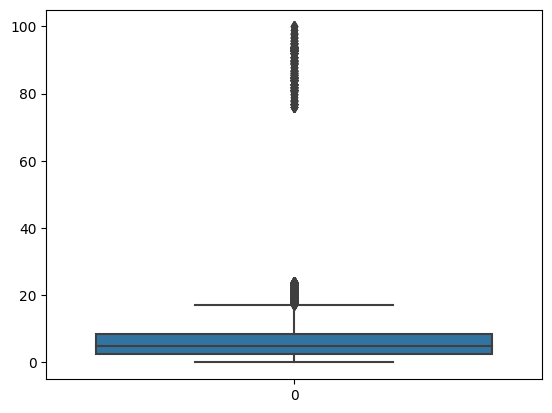

In [ ]:
import seaborn as sns
sns.boxplot(df['TIME_IN_SHIFT'])

In [ ]:
target = pd.DataFrame()
target['ACCIDENT_TYPE'] = le.fit_transform(data['ACCIDENT_TYPE'])
target['ACTIVITY'] = le.fit_transform(data['ACTIVITY'])
target['CLASS'] = le.fit_transform(data['CLASSIFICATION'])
target['DEGREE_INJ'] = le.fit_transform(data['DEGREE_INJURY'])
target['IMMED_NOT'] = le.fit_transform(data['IMMED_NOTIFY'])
target['INJ_SRC'] = le.fit_transform(data['INJURY_SOURCE'])
target['NAT_INJ'] = le.fit_transform(data['NATURE_INJURY'])
target['SUBUNIT'] = le.fit_transform(data['SUBUNIT'])
target['UG_LOC'] = le.fit_transform(data['UG_LOCATION'])
target['UG_MET'] = le.fit_transform(data['UG_MINING_METHOD'])
target['NUM_INJ'] = data['NO_INJURIES']
target['ACCIDENT_TIME'] = data['ACCIDENT_TIME']

In [ ]:
target

,ACCIDENT_TYPE,ACTIVITY,CLASS,DEGREE_INJ,IMMED_NOT,INJ_SRC,NAT_INJ,SUBUNIT,UG_LOC,UG_MET,NUM_INJ,ACCIDENT_TIME
0,0,41,5,8,8,23,2,4,3,5,1,1330
1,0,75,5,2,8,1,2,8,8,1,1,1400
2,36,41,5,2,8,69,29,6,3,5,1,1325
3,34,54,5,2,8,69,7,4,3,5,1,1140
4,29,41,5,2,8,69,27,8,2,4,1,1430
...,...,...,...,...,...,...,...,...,...,...,...,...
36011,26,47,8,6,8,75,16,8,6,1,1,2054
36012,37,54,8,8,8,91,10,6,3,5,1,2200
36013,26,12,8,6,8,75,16,7,3,5,1,730
36014,0,41,8,2,8,3,25,8,0,4,1,1830


In [ ]:
target[target.index.isin(df.index)].to_csv("/content/drive/MyDrive/Trilytics/BEFORE_TGT.csv", index=0)

In [ ]:
target[target.index.isin(df.index)]

,ACCIDENT_TYPE,ACTIVITY,CLASS,DEGREE_INJ,IMMED_NOT,INJ_SRC,NAT_INJ,SUBUNIT,UG_LOC,UG_MET,NUM_INJ
0,0,41,5,8,8,23,2,4,3,5,1
1,0,75,5,2,8,1,2,8,8,1,1
2,36,41,5,2,8,69,29,6,3,5,1
3,34,54,5,2,8,69,7,4,3,5,1
4,29,41,5,2,8,69,27,8,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...
36009,26,89,8,6,8,75,24,6,3,5,1
36011,26,47,8,6,8,75,16,8,6,1,1
36012,37,54,8,8,8,91,10,6,3,5,1
36013,26,12,8,6,8,75,16,7,3,5,1


In [ ]:
target['ACCIDENT_TYPE'].nunique()

42

<Axes: xlabel='ACCIDENT_TYPE', ylabel='Count'>

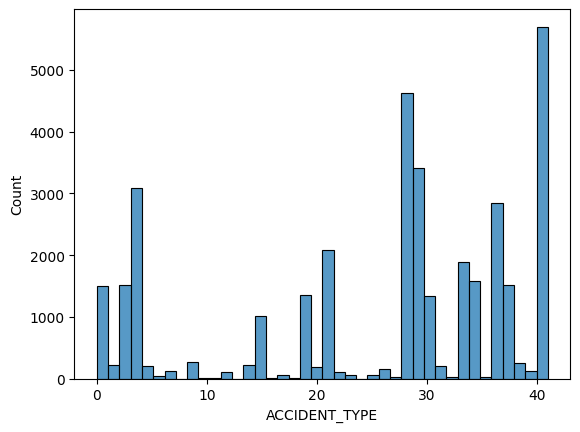

In [ ]:
sns.histplot(target['ACCIDENT_TYPE'])

## Part 3

In [ ]:
df = pd.DataFrame()
df['ACCIDENT_DAY'] = pd.to_datetime(data['ACCIDENT_DT']).dt.dayofweek
df['ACCIDENT_MONTH'] = pd.to_datetime(data['ACCIDENT_DT']).dt.month
df['ACCIDENT_QTR'] = pd.to_datetime(data['ACCIDENT_DT']).dt.quarter
df['ACCIDENT_YEAR'] = pd.to_datetime(data['ACCIDENT_DT']).dt.year


In [ ]:
df

""


## KPI

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Trilytics/data.csv")

In [ ]:
# Lost time injury frequency
(len(data[data['DAYS_LOST']>0])/(data['ACCIDENT_TIME']-data['SHIFT_BEGIN_TIME']).sum())*1000000

8768.02200653032

In [ ]:
(data['NO_INJURIES'].sum()/(data['ACCIDENT_TIME']-data['SHIFT_BEGIN_TIME']).sum())*1000000

14891.784969116841

In [ ]:
(len(data[data['DEGREE_INJURY']=='FATALITY'])/(data['ACCIDENT_TIME']-data['SHIFT_BEGIN_TIME']).sum())*1000000

76.22941447203138

In [ ]:
s = '''
Name	Alpha code	Numeric code	Status
Alabama	AL	01	State; counties
Alaska	AK	02	State; boroughs
American Samoa	AS	60	Outlying area under U.S. sovereignty
American Samoa *		03	(FIPS 5-1 reserved code)
Arizona	AZ	04	State; counties
Arkansas	AR	05	State; counties
Baker Island	BI	81	Minor outlying island territory
California	CA	06	State; counties
Canal Zone *		07	(FIPS 5-1 reserved code)
Colorado	CO	08	State; counties
Connecticut	CT	09	State; counties
Delaware	DE	10	State; counties
District of Columbia	DC	11	Federal district[4]
Federated States of Micronesia	FM	64	Freely Associated State
Florida	FL	12	State; counties
Georgia	GA	13	State; counties
Guam	GU	66	Outlying area under U.S. sovereignty
Guam *		14	(FIPS 5-1 reserved code)
Hawaii	HI	15	State; counties
Howland Island	HI	84	Minor outlying island territory
Idaho	ID	16	State; counties
Illinois	IL	17	State; counties
Indiana	IN	18	State; counties
Iowa	IA	19	State; counties
Jarvis Island	JI	86	Minor outlying island territory
Johnston Atoll	JA	67	Minor outlying island territory
Kansas	KS	20	State; counties
Kentucky	KY	21	State; counties
Kingman Reef	KR	89	Minor outlying island territory
Louisiana	LA	22	State; parishes
Maine	ME	23	State; counties
Marshall Islands	MH	68	Freely Associated State
Maryland	MD	24	State; counties
Massachusetts	MA	25	State; counties
Michigan	MI	26	State; counties
Midway Islands	MI	71	Minor outlying island territory
Minnesota	MN	27	State; counties
Mississippi	MS	28	State; counties
Missouri	MO	29	State; counties
Montana	MT	30	State; counties
Navassa Island	NI	76	Minor outlying island territory
Nebraska	NE	31	State; counties
Nevada	NV	32	State; counties
New Hampshire	NH	33	State; counties
New Jersey	NJ	34	State; counties
New Mexico	NM	35	State; counties
New York	NY	36	State; counties
North Carolina	NC	37	State; counties
North Dakota	ND	38	State; counties
Northern Mariana Islands	MP	69	Outlying area under U.S. sovereignty
Ohio	OH	39	State; counties
Oklahoma	OK	40	State; counties
Oregon	OR	41	State; counties
Palau	PW	70	Freely Associated State
Palmyra Atoll	PA	95	Minor outlying island territory
Pennsylvania	PA	42	State; counties
Puerto Rico	PR	72	Outlying area under U.S. sovereignty
Puerto Rico *		43	(FIPS 5-1 reserved code)
Rhode Island	RI	44	State; counties
South Carolina	SC	45	State; counties
South Dakota	SD	46	State; counties
Tennessee	TN	47	State; counties
Texas	TX	48	State; counties
U.S. Minor Outlying Islands	UM	74	Minor outlying island territories (aggregated)
Utah	UT	49	State; counties
Vermont	VT	50	State; counties
Virgin Islands of the U.S.	VI	78	Outlying area under U.S. sovereignty
Virgin Islands of the U.S. *		52	(FIPS 5-1 reserved code)
Virginia	VA	51	State; counties
Wake Island	WI	79	Minor outlying island territory
Washington	WA	53	State; counties
West Virginia	WV	54	State; counties
Wisconsin	WI	55	State; counties
Wyoming	WY	56	State; counties'''
# Split the data into lines and remove leading/trailing whitespaces
lines = s.strip().split("\n")

# Extract the column headers and remove leading/trailing whitespaces
headers = lines[0].split("\t")

# Initialize an empty list to store the dictionary entries
state_data = []

# Process each line of data (excluding the header)
for line in lines[1:]:
    values = line.split("\t")
    state_info = {
        headers[0]: values[0].strip(),
        headers[1]: values[1].strip(),
        headers[2]: values[2].strip(),
        headers[3]: values[3].strip(),
    }
    state_data.append((values[0],values[2]))

# Convert the list of dictionaries into a Python dictionary
state_dict = {int(j):i for i, j in state_data}

# Print the resulting dictionary
print(state_dict)

{1: 'Alabama', 2: 'Alaska', 60: 'American Samoa', 3: 'American Samoa *', 4: 'Arizona', 5: 'Arkansas', 81: 'Baker Island', 6: 'California', 7: 'Canal Zone *', 8: 'Colorado', 9: 'Connecticut', 10: 'Delaware', 11: 'District of Columbia', 64: 'Federated States of Micronesia', 12: 'Florida', 13: 'Georgia', 66: 'Guam', 14: 'Guam *', 15: 'Hawaii', 84: 'Howland Island', 16: 'Idaho', 17: 'Illinois', 18: 'Indiana', 19: 'Iowa', 86: 'Jarvis Island', 67: 'Johnston Atoll', 20: 'Kansas', 21: 'Kentucky', 89: 'Kingman Reef', 22: 'Louisiana', 23: 'Maine', 68: 'Marshall Islands', 24: 'Maryland', 25: 'Massachusetts', 26: 'Michigan', 71: 'Midway Islands', 27: 'Minnesota', 28: 'Mississippi', 29: 'Missouri', 30: 'Montana', 76: 'Navassa Island', 31: 'Nebraska', 32: 'Nevada', 33: 'New Hampshire', 34: 'New Jersey', 35: 'New Mexico', 36: 'New York', 37: 'North Carolina', 38: 'North Dakota', 69: 'Northern Mariana Islands', 39: 'Ohio', 40: 'Oklahoma', 41: 'Oregon', 70: 'Palau', 95: 'Palmyra Atoll', 42: 'Pennsylvan

In [ ]:
data['STATE'] = data['FIPS_STATE_CD'].map(state_dict)

In [ ]:
data['FIPS_STATE_CD']

0         1
1         1
2         1
3         4
4         8
         ..
36011    51
36012    51
36013    54
36014    54
36015    54
Name: FIPS_STATE_CD, Length: 36016, dtype: int64

In [ ]:
data

,DOCUMENT_NO,SUBUNIT_CD,SUBUNIT,ACCIDENT_DT,CAL_YR,CAL_QTR,FISCAL_YR,FISCAL_QTR,ACCIDENT_TIME,DEGREE_INJURY_CD,...,TRANS_TERM,RETURN_TO_WORK_DT,IMMED_NOTIFY_CD,IMMED_NOTIFY,INVEST_BEGIN_DT,NARRATIVE,CLOSED_DOC_NO,COAL_METAL_IND,CLASSIFICATION,STATE
0,220143000000,30,MILL OPERATION/PREPARATION PLANT,9/8/2014,2014,3,2014,4,1330,6,...,N,9/9/2014,?,NO VALUE FOUND,NaN,ee was moving a caustic line when the line fel...,NaN,C,HANDLING OF MATERIALS,Alabama
1,220163000000,1,UNDERGROUND,10/26/2016,2016,4,2017,1,1400,3,...,N,11/9/2016,?,NO VALUE FOUND,NaN,employee was building and plastering a brattic...,3.201630e+11,C,HANDLING OF MATERIALS,Alabama
2,220053000000,3,"STRIP, QUARY, OPEN PIT",10/4/2005,2005,4,2006,1,1325,3,...,N,10/6/2005,?,NO VALUE FOUND,NaN,he was lifting a piece of steel. he place a ch...,NaN,C,HANDLING OF MATERIALS,Alabama
3,220063000000,30,MILL OPERATION/PREPARATION PLANT,10/17/2006,2006,4,2007,1,1140,3,...,NaN,NaN,?,NO VALUE FOUND,NaN,the technician was greasing on the sample syst...,NaN,C,HANDLING OF MATERIALS,Arizona
4,220151000000,1,UNDERGROUND,2/11/2015,2015,1,2015,2,1430,3,...,Y,2/27/2015,?,NO VALUE FOUND,NaN,"as employee was lifting top frame of 84"" struc...",3.201510e+11,C,HANDLING OF MATERIALS,Colorado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36011,220083000000,1,UNDERGROUND,11/7/2008,2008,4,2009,1,2054,8,...,NaN,NaN,?,NO VALUE FOUND,11/7/2008,employee was found slumped over a three wheel ...,NaN,C,OTHER,Virginia
36012,220060000000,3,"STRIP, QUARY, OPEN PIT",1/3/2006,2006,1,2006,2,2200,6,...,N,1/3/2006,?,NO VALUE FOUND,NaN,employee was repairing equipment when wind ble...,NaN,C,OTHER,Virginia
36013,220043000000,2,SURFACE AT UNDERGROUND,10/18/2004,2004,4,2005,1,730,8,...,NaN,NaN,?,NO VALUE FOUND,10/18/2004,"was getting dressed prior to his shift, the em...",NaN,C,OTHER,West Virginia
36014,220181000000,1,UNDERGROUND,5/2/2018,2018,2,2018,3,1830,3,...,N,6/11/2018,?,NO VALUE FOUND,NaN,a fully trained miner was bitten by a spider w...,3.201820e+11,C,OTHER,West Virginia


In [ ]:
data.to_csv("data.csv", index=False)